# Chapter 2, demo 4

Bayesian Data Analysis, 3rd ed


Probability of a girl birth given placenta previa (BDA3 p. 37).
Calculate the posterior distribution on a discrete grid of points by multiplying the likelihood and a non-conjugate prior at each point, and normalizing over the points. Simulate samples from the resulting non-standard posterior distribution using inverse cdf using the discrete grid.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import preliz as pz

pz.style.use("preliz-doc")

## Evaluating posterior with non-conjugate prior in grid

In [2]:
# data
a = 437
b = 543

# grid of nx points
nx = 1000
x = np.linspace(0, 1, nx)

# compute density of non-conjugate prior in grid
# this non-conjugate prior is same as in Figure 2.4 in the book
pp = np.ones(nx)
ascent = (0.385 <= x) & (x <= 0.485)
descent = (0.485 <= x) & (x <= 0.585)
pm = 11
pp[ascent] = np.linspace(1, pm, ascent.sum())
pp[descent] = np.linspace(pm, 1, descent.sum())
# normalize the prior
pp /= np.sum(pp)

# unnormalized non-conjugate posterior in grid
po = pz.Beta(a, b).pdf(x) * pp
po /= np.sum(po)
# cumulative
pc = np.cumsum(po)

# inverse-cdf sampling
# get n uniform random numbers from [0,1]
n = 10_000
r = np.random.rand(n)
# Map each uniform random number r to its corresponding x value
# by finding the first index where r <= pc (inverse-CDF sampling)
rr = x[np.searchsorted(pc, r)]

#### Plot results

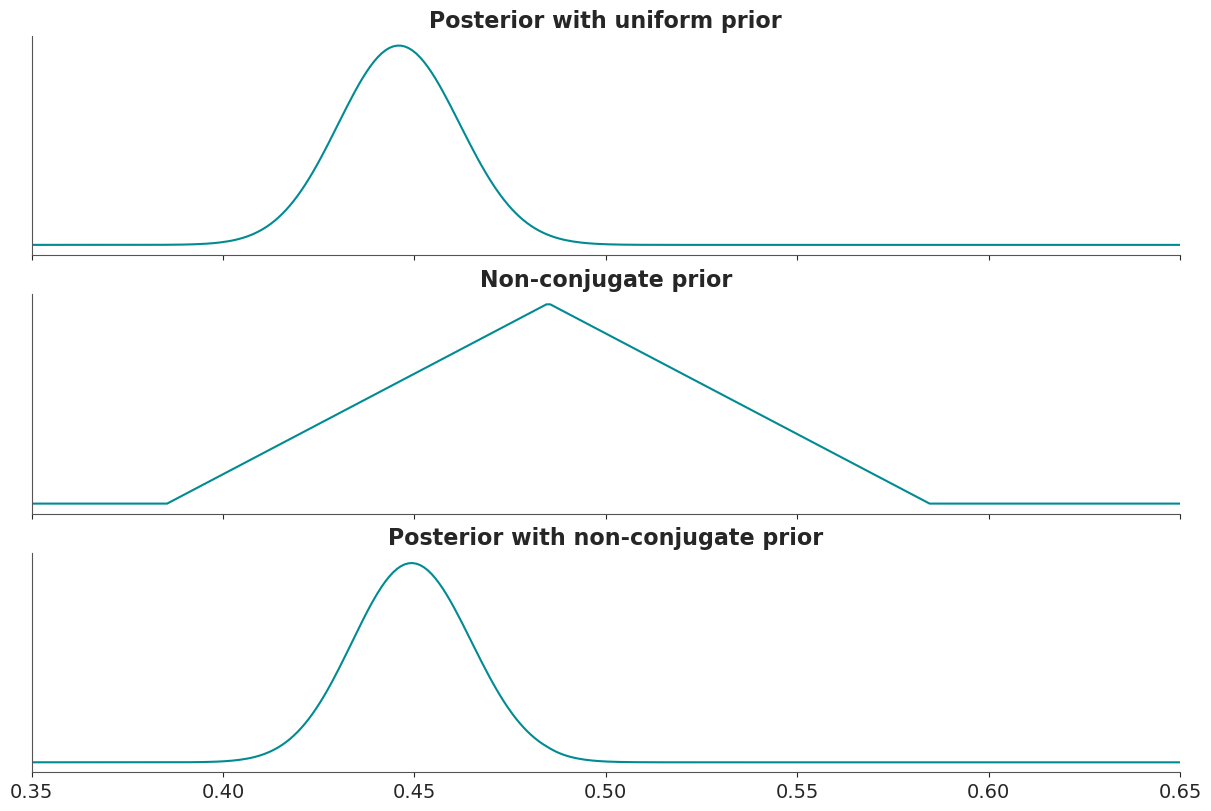

In [3]:
# plot 3 subplots
_, axes = plt.subplots(3, 1, sharex=True, figsize=(12, 8))

for pdf, title, ax in zip((pz.Beta(a+1, b+1).pdf(x),pp, po),
                        ('Posterior with uniform prior', 'Non-conjugate prior', 'Posterior with non-conjugate prior'),
                        axes.ravel()):
    ax.plot(x, pdf)
    ax.set_title(title)
    ax.set_yticks([])

# set custom x-limits
axes[0].set_xlim((0.35, 0.65));

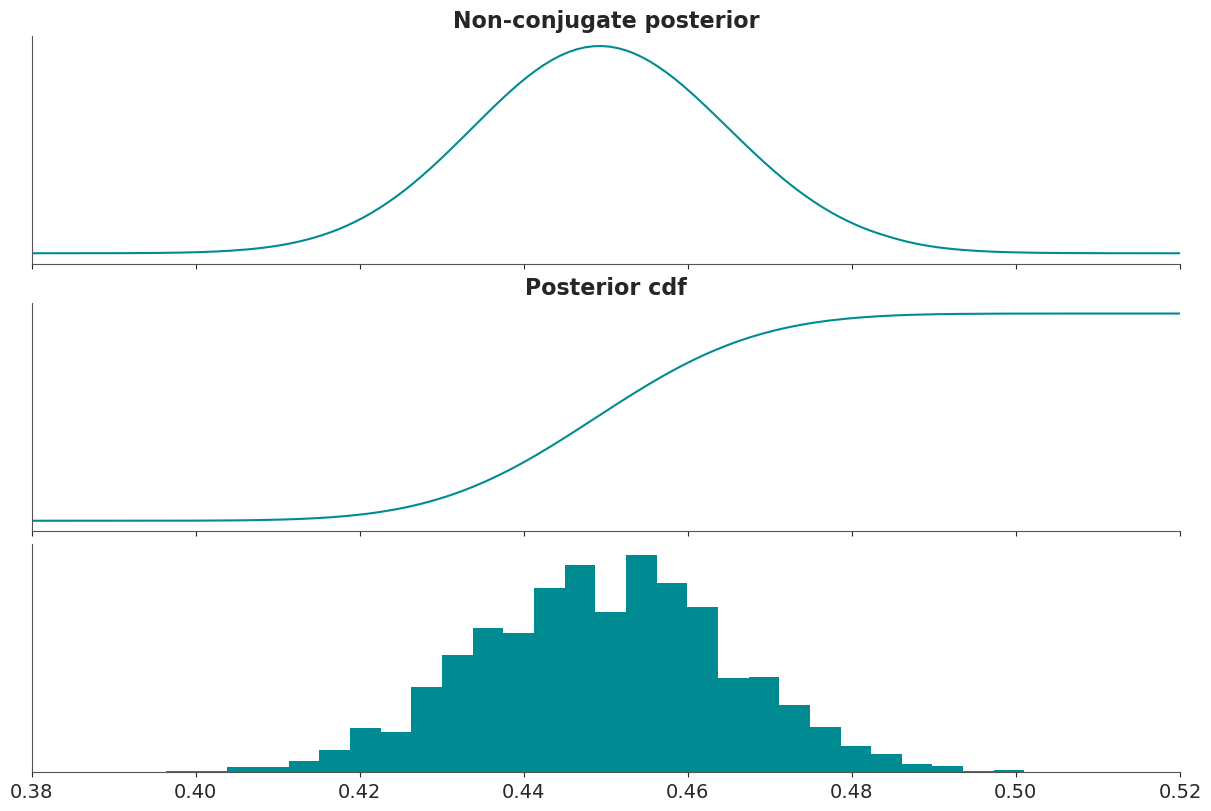

In [4]:
_, axes = plt.subplots(3, 1, sharex=True, figsize=(12, 8))

for idx, (dens, title, ax) in enumerate(zip((po, pc, rr),
                                            ('Non-conjugate posterior', 'Posterior cdf', 'histogram of posterior samples'),
                                            axes.ravel())
):
    if idx == 2:
        ax.hist(dens, bins=30, density=True)
    else:
        ax.plot(x, dens)
        ax.set_title(title)
    ax.set_yticks([])

# set custom x-limits
axes[0].set_xlim((0.38, 0.52));

Authors:
- Aki Vehtari <aki.vehtari@aalto.fi>
- Tuomas Sivula <tuomas.sivula@aalto.fi>
- Osvaldo A. Martin <osvaldo.martin@aalto.fi>